In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('../BD/Supermercado.csv')

In [3]:
dias_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

df['dia'] = df['order_dow'].map(dias_semana)

df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,Miércoles
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,Miércoles
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,Miércoles
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,Miércoles
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,Miércoles


In [4]:
df = df.dropna()

In [5]:
def order_time(x):
    if x in[6, 7, 8, 9, 10, 11, 12]:
        return 'Morning'
    if x in[13, 14, 15, 16, 17]:
        return 'Afternoon'
    if x in[18, 19, 20, 21, 22]:
        return 'Night'
    if x in[23, 24, 0, 1, 2, 3, 4, 5]:
        return 'Dawn'
    return x

In [6]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia,order_time_list
1995919,457859,30335,3,1,22,30.0,91,11,1,16,dairy eggs,soy lactosefree,Martes,Night
1715417,2730919,129142,7,6,11,16.0,59,12,0,15,canned goods,canned meals beans,Domingo,Morning
1860292,717632,87535,16,4,16,6.0,50,15,1,19,snacks,fruit vegetable snacks,Viernes,Afternoon
586624,407839,146296,23,5,9,8.0,84,2,1,16,dairy eggs,milk,Sábado,Morning
865201,641376,170356,3,3,10,4.0,108,3,1,16,dairy eggs,other creams cheeses,Jueves,Morning


In [7]:
max_order_numbers = df.groupby('user_id')['order_number'].max().reset_index()
max_order_numbers.rename(columns={'order_number': 'max_order'}, inplace=True)

df = df.merge(max_order_numbers, on='user_id', how='left')

#### CLUSTERING

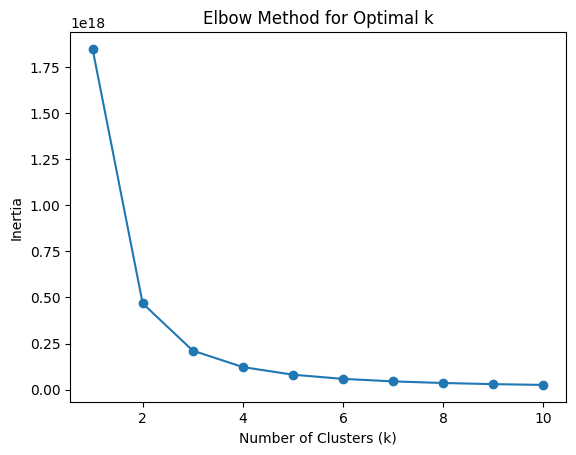

In [8]:
X = df[['order_id', 'user_id', 'max_order', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\Matias\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


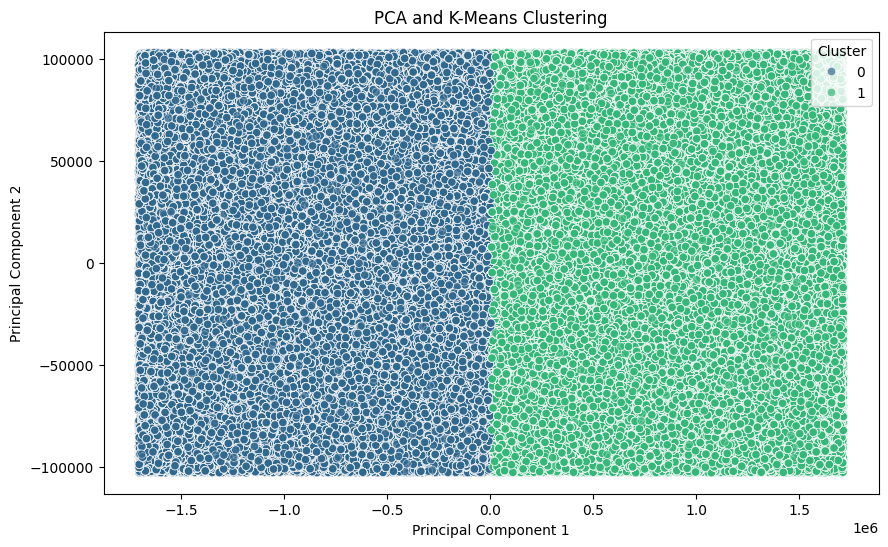

In [9]:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c1 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c1['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c1, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

c:\Users\Matias\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


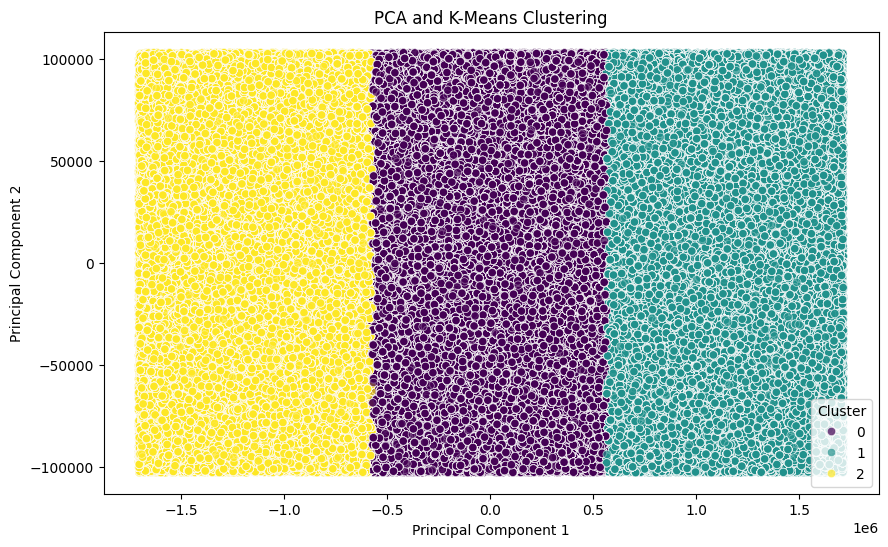

In [10]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

##### Clusterización en base a Department_id

In [11]:
X2 = df[['user_id', 'department_id']]

In [12]:
X_train = X2.values

kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

print("The cluster are  :", kmeans.labels_)

print("The Inertia is :", kmeans.inertia_)

The cluster are  : [1 1 1 ... 5 5 5]
The Inertia is : 186396189851242.62


In [13]:
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  1676186968899230.0
The inertia for : 3 Cluster is :  744372630344396.0
The inertia for : 4 Cluster is :  418365119094332.7
The inertia for : 5 Cluster is :  265989802641285.44
The inertia for : 6 Cluster is :  186396189851242.62
The inertia for : 7 Cluster is :  136555101345156.83
The inertia for : 8 Cluster is :  104800940338138.3
The inertia for : 9 Cluster is :  83522280626327.8


Text(0.5, 1.0, 'Inertia Plot per k')

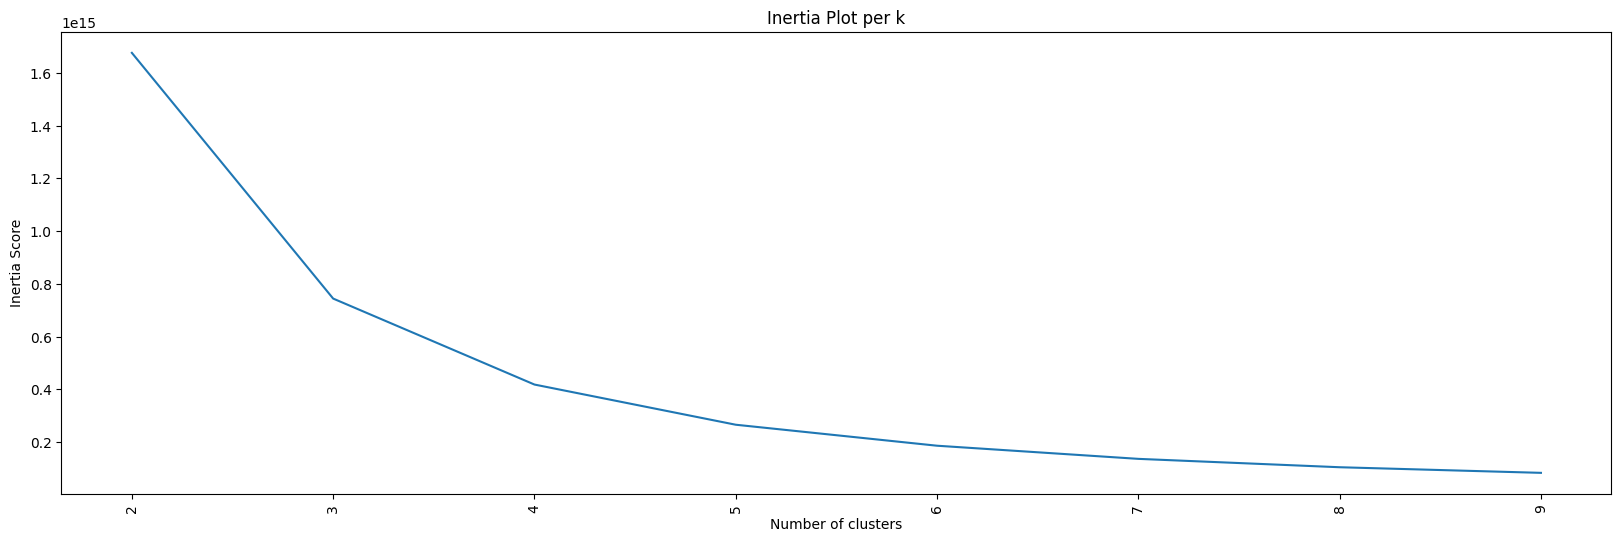

In [14]:
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

In [15]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

predictions = kmeans.predict(X_train)

unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,372036,386282,377631,384643,374567


In [16]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

Explained variance ratio (first two components): [9.99999989e-01 1.11647712e-08]


<Figure size 640x480 with 0 Axes>

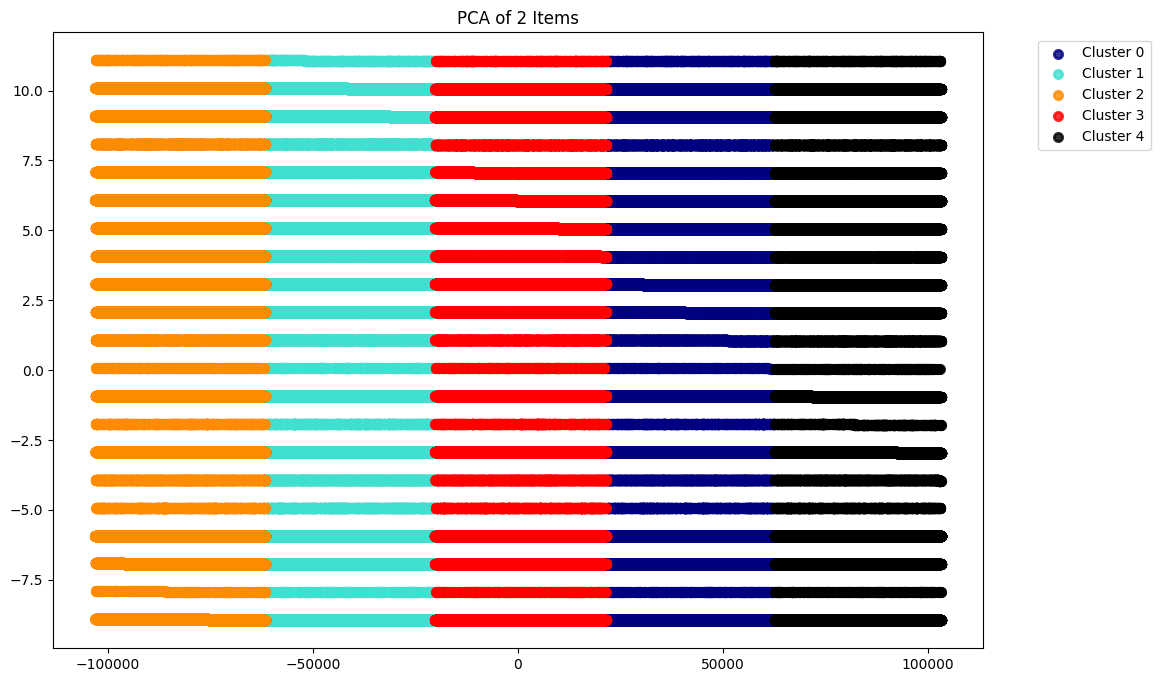

In [18]:
X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [19]:
df['Clusters'] = kmeans.labels_

In [22]:
cluster_describe = df['Clusters'].describe()

print(cluster_describe)

count    1.895159e+06
mean     2.001806e+00
std      1.408047e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: Clusters, dtype: float64


In [23]:
department_counts = df.groupby('Clusters')['department_id'].value_counts()
print(department_counts)

Clusters  department_id
0         4                108474
          16                61981
          19                33837
          7                 30602
          1                 25668
                            ...  
4         5                  1638
          8                  1062
          21                  891
          2                   392
          10                  384
Name: count, Length: 105, dtype: int64


In [24]:
df.head(1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia,order_time_list,max_order,Clusters
0,1201011,147243,14,0,16,3.0,94,1,0,7,beverages,tea,Lunes,Afternoon,38,0


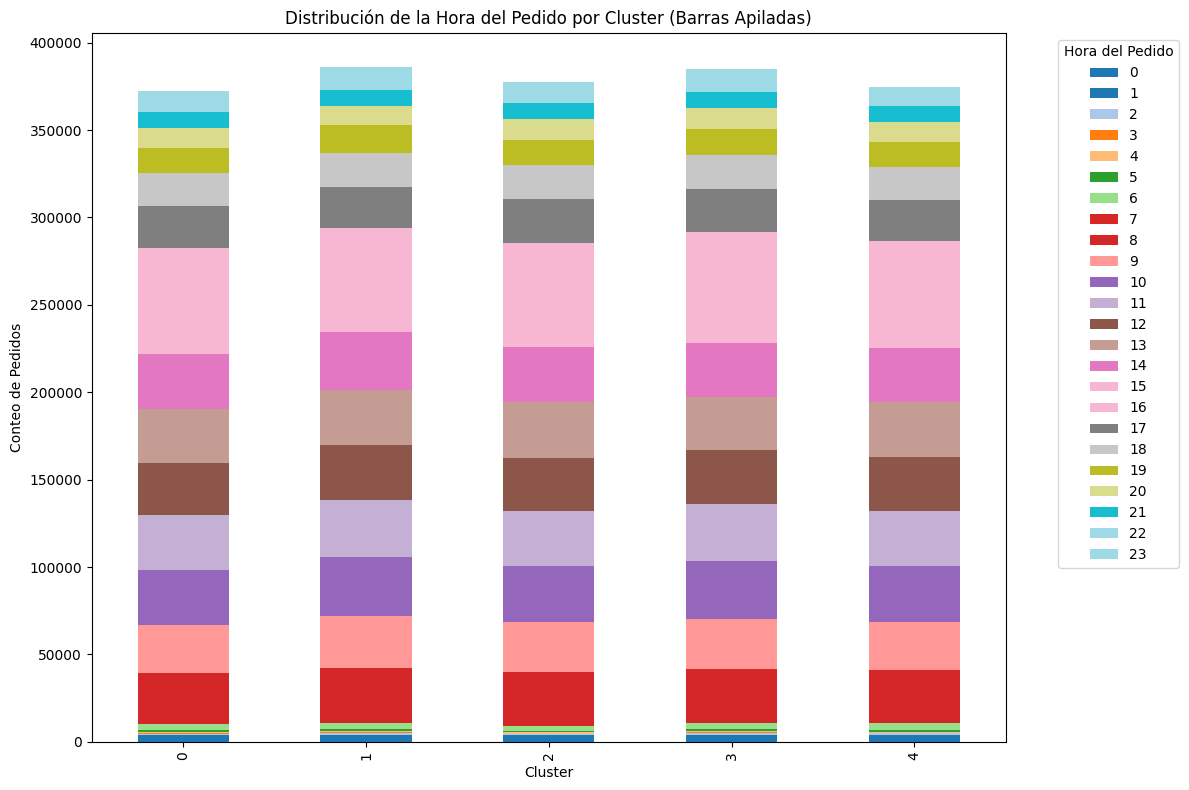

In [26]:
# Crear una tabla de contingencia con el conteo de pedidos por cluster y hora del pedido
pivot_table = pd.crosstab(df['Clusters'], df['order_hour_of_day'])

# Graficar un gráfico de barras apiladas
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribución de la Hora del Pedido por Cluster (Barras Apiladas)')
plt.xlabel('Cluster')
plt.ylabel('Conteo de Pedidos')
plt.legend(title='Hora del Pedido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



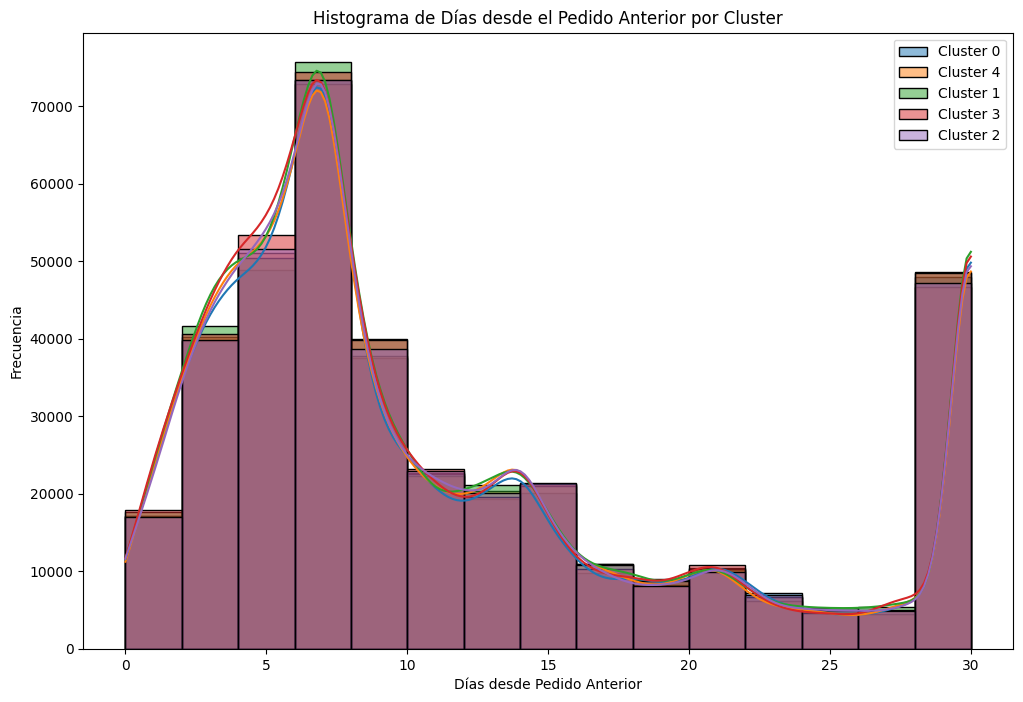

In [27]:
plt.figure(figsize=(12, 8))
for cluster in df['Clusters'].unique():
    sns.histplot(df[df['Clusters'] == cluster]['days_since_prior_order'], label=f'Cluster {cluster}', kde=True, bins=15)
plt.title('Histograma de Días desde el Pedido Anterior por Cluster')
plt.xlabel('Días desde Pedido Anterior')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

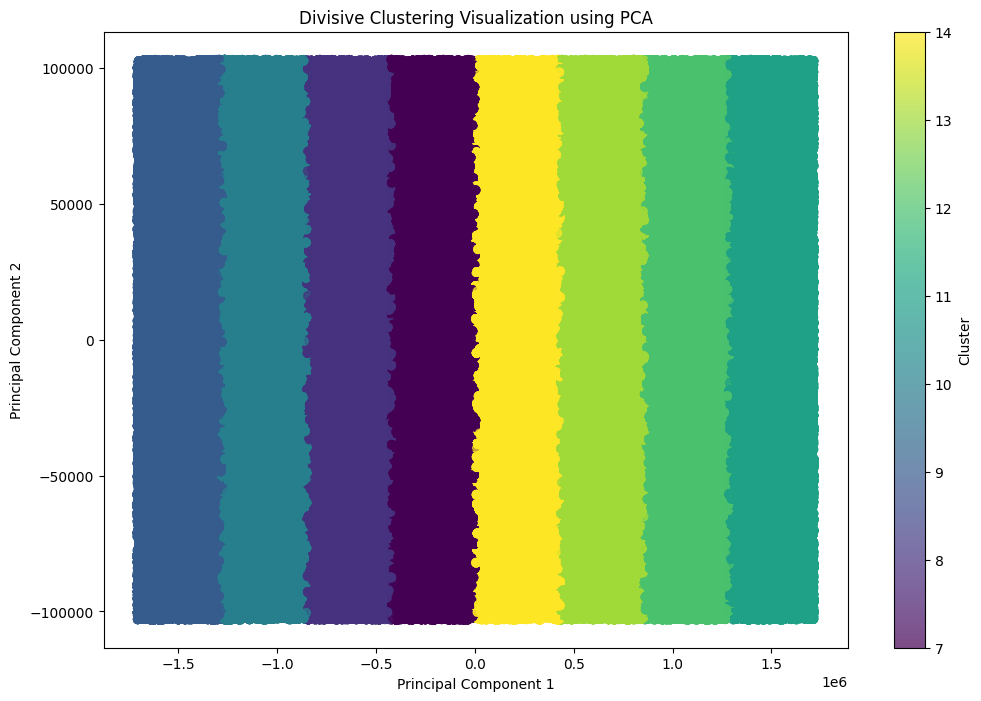

In [29]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que ya tienes un DataFrame 'df' preprocesado y listo
X = df[['order_id', 'user_id', 'max_order', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id']]

# Función de clustering divisivo con indexación
def divisive_clustering(X, n_clusters=2, max_splits=5):
    clusters = {0: X.index}  # Inicia con el índice de todos los datos en un solo cluster
    labels = np.zeros(X.shape[0], dtype=int)
    cluster_id = 1  # ID de clusters únicos

    for _ in range(max_splits):
        new_clusters = {}
        for cluster_key, indices in clusters.items():
            data = X.loc[indices]  # Subconjunto de datos usando el índice original
            
            # Aplicar K-means para dividir el cluster en dos
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            sub_labels = kmeans.fit_predict(data)
            
            # Crear nuevos clusters a partir de las divisiones
            for i in range(n_clusters):
                split_indices = indices[sub_labels == i]
                new_clusters[cluster_id] = split_indices
                labels[split_indices] = cluster_id
                cluster_id += 1

        # Actualizar clusters
        clusters = new_clusters

    return labels

# Ejecutar el clustering divisivo
labels = divisive_clustering(X, n_clusters=2, max_splits=3)

# Añadir los labels al DataFrame original
df['Divisive_Cluster'] = labels

# Visualizar los clusters utilizando PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

# Graficar los resultados
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Divisive Clustering Visualization using PCA')
plt.show()



In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Supongamos que tienes el DataFrame 'df' preprocesado con las características seleccionadas
X = df[['order_id', 'user_id', 'max_order', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id']]

# Función de clustering divisivo ajustada
def divisive_clustering(X, n_clusters=2, max_splits=2):
    clusters = {0: X.index}  # Iniciar con todos los datos en un solo cluster
    labels = np.zeros(X.shape[0], dtype=int)
    cluster_id = 1  # ID de clusters únicos

    for _ in range(max_splits):
        new_clusters = {}
        for cluster_key, indices in clusters.items():
            data = X.loc[indices]  # Trabajar con el subconjunto de datos usando el índice original
            
            # Aplicar K-means para dividir el cluster en dos
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            sub_labels = kmeans.fit_predict(data)
            
            # Crear nuevos clusters a partir de las divisiones
            for i in range(n_clusters):
                split_indices = indices[sub_labels == i]
                new_clusters[cluster_id] = split_indices
                labels[split_indices] = cluster_id
                cluster_id += 1

        # Actualizar clusters
        clusters = new_clusters

    return labels

# Ejecutar el clustering divisivo con el nuevo max_splits
labels = divisive_clustering(X, n_clusters=2, max_splits=2)

# Añadir los labels al DataFrame original
df['Divisive_Cluster'] = labels

# Evaluar la calidad del clustering usando Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualizar los clusters utilizando PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

# Graficar los resultados
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Adjusted Divisive Clustering Visualization using PCA')
plt.show()


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Función DiviK personalizada
def divik_clustering(X, max_splits=2, min_cluster_size=50, min_silhouette=0.2):
    clusters = {0: X.index}  # Iniciar con todos los datos en un solo cluster
    labels = np.zeros(X.shape[0], dtype=int)
    cluster_id = 1  # ID de clusters únicos

    def split_cluster(data, indices):
        kmeans = KMeans(n_clusters=2, random_state=42)
        sub_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, sub_labels)

        # Dividir solo si el score de Silhouette es aceptable y el tamaño del cluster es adecuado
        if silhouette_avg >= min_silhouette and len(data) > min_cluster_size:
            return [indices[sub_labels == i] for i in range(2)]
        else:
            return [indices]  # No dividir si las condiciones no se cumplen

    # Iteración de división
    for _ in range(max_splits):
        new_clusters = {}
        for cluster_key, indices in clusters.items():
            data = X.loc[indices]  # Subconjunto de datos utilizando el índice original
            
            # Intentar dividir el cluster en dos
            split = split_cluster(data, indices)
            if len(split) == 2:  # Se logró dividir
                for part in split:
                    new_clusters[cluster_id] = part
                    labels[part] = cluster_id
                    cluster_id += 1
            else:  # No se divide, mantiene el cluster original
                new_clusters[cluster_key] = indices

        # Actualizar clusters
        clusters = new_clusters

    return labels

# Supongamos que tienes el DataFrame 'df' con las características seleccionadas
X = df[['order_id', 'user_id', 'max_order', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id']]

# Ejecutar DiviK Clustering
labels = divik_clustering(X, max_splits=3, min_cluster_size=100, min_silhouette=0.25)

# Añadir los labels al DataFrame original
df['DiviK_Cluster'] = labels

# Evaluar la calidad del clustering usando Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualizar los clusters utilizando PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

# Graficar los resultados
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DiviK Clustering Visualization using PCA')
plt.show()
